**Równania różniczkowe - spectral bias**

In [17]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import deepxde as dde
import tensorflow.compat.v1 as tf # tensorflow==2.15.0 tensorflow-probability==0.23.0

**Zadanie 1.**

In [18]:
# Problem specific data
a = -2*np.pi
b = 2*np.pi

In [19]:
# Procedure definition
def Procedure(omega, hidden_layers, neurons_per_layer, num_training, num_test):
    # Domain
    def ode(x, y) :
        du_x = dde . grad . jacobian (y , x , i =0 , j =0)
        return du_x - tf.cos(omega*x)
    
    geom = dde.geometry.Interval(a, b)
    
    # Conditions and training data
    bc = dde.icbc.DirichletBC(geom, lambda x: 0,
                    lambda _, on_boundary: on_boundary)

    data = dde.data.PDE(
        geom,
        ode,
        bc,
        num_domain = num_training,
        # num_boundary = 2,
        num_test = num_test,
    )

    # Network
    layer_size = [1] + [neurons_per_layer]*hidden_layers + [1]
    activation = "tanh"
    initializer = "Glorot normal"
    net = dde.nn.FNN(layer_size, activation, initializer)

    # Model
    model = dde.Model(data, net)
    optimizer = "adam"
    model.compile(optimizer, lr=0.001)
    losshistory, train_state = model.train(iterations=50000)

    # Results
    x_data = np.linspace(a, b, num=num_test)[:, None]

    u_pred = model.predict(x_data)
    u_true = 1/omega * np.sin(omega*x_data)
    residual = model.predict(x_data, operator=ode)

    return x_data, u_pred, u_true, residual


In [20]:
# Ansatz Procedure definition
def Procedure_Ansatz(omega, hidden_layers, neurons_per_layer, num_training, num_test):
    # Domain
    def ode(x, y) :
        du_x = dde . grad . jacobian (y , x , i =0 , j =0)
        return du_x - tf.cos(omega*x)
    
    geom = dde.geometry.Interval(a, b)
    
    # Conditions and training data
    data = dde.data.PDE(
        geom,
        ode,
        [],
        num_domain = num_training,
        # num_boundary = 2,
        num_test = num_test,
    )


    # Network
    layer_size = [1] + [neurons_per_layer]*hidden_layers + [1]
    activation = "tanh"
    initializer = "Glorot normal"
    net = dde.nn.FNN(layer_size, activation, initializer)

    # Model
    model = dde.Model(data, net)
    optimizer = "adam"
    model.compile(optimizer, lr=0.001)
    losshistory, train_state = model.train(iterations=50000)

    # Results
    x_data = np.linspace(a, b, num=num_test)[:, None]

    u_pred = np.tanh(omega*x_data) * model.predict(x_data)
    u_true = 1/omega * np.sin(omega*x_data)
    residual = model.predict(x_data, operator=ode)

    return x_data, u_pred, u_true, residual


Compiling model...
Building feed-forward neural network...
'build' took 0.095159 s



/home/mateusz-krol/Desktop/repos/Computation-Methods-for-Science-and-Technology/.venv/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.722389 s

Training model...

Step      Train loss              Test loss               Test metric
0         [5.10e-01, nan]         [5.13e-01, nan]         []  

Best model at step 0:
  train loss: inf
  test loss: inf
  test metric: 

'train' took 0.996765 s



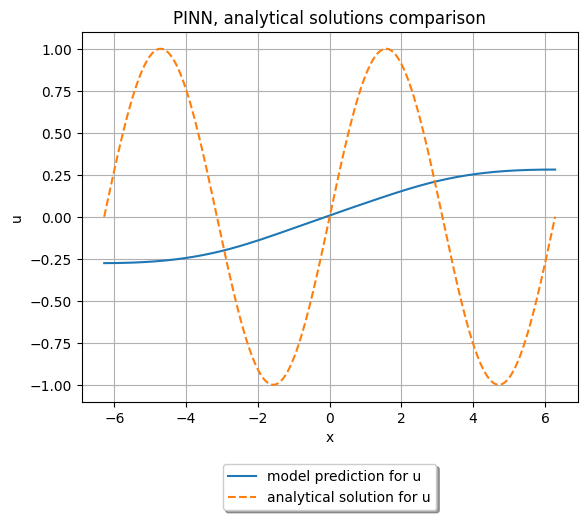

Compiling model...
Building feed-forward neural network...
'build' took 0.099253 s



/home/mateusz-krol/Desktop/repos/Computation-Methods-for-Science-and-Technology/.venv/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.717468 s

Training model...

Step      Train loss    Test loss     Test metric
0         [7.17e-01]    [7.19e-01]    []  
1000      [9.74e-04]    [1.03e-03]    []  
2000      [1.41e-05]    [1.42e-05]    []  
3000      [4.96e-06]    [5.15e-06]    []  
4000      [3.40e-06]    [3.70e-06]    []  
5000      [2.66e-06]    [2.96e-06]    []  
6000      [2.06e-06]    [2.32e-06]    []  
7000      [5.62e-06]    [5.72e-06]    []  
8000      [1.06e-06]    [1.20e-06]    []  
9000      [7.95e-07]    [8.81e-07]    []  
10000     [4.86e-07]    [5.32e-07]    []  
11000     [1.28e-06]    [1.30e-06]    []  
12000     [2.20e-07]    [2.33e-07]    []  
13000     [8.89e-07]    [8.95e-07]    []  
14000     [3.97e-06]    [3.94e-06]    []  
15000     [8.33e-08]    [8.68e-08]    []  
16000     [6.55e-08]    [6.95e-08]    []  
17000     [5.41e-08]    [5.93e-08]    []  
18000     [7.40e-08]    [8.06e-08]    []  
19000     [7.46e-08]    [8.24e-08]    []  
20000     [1.45e-07]    [1.50e-07]    []  
2

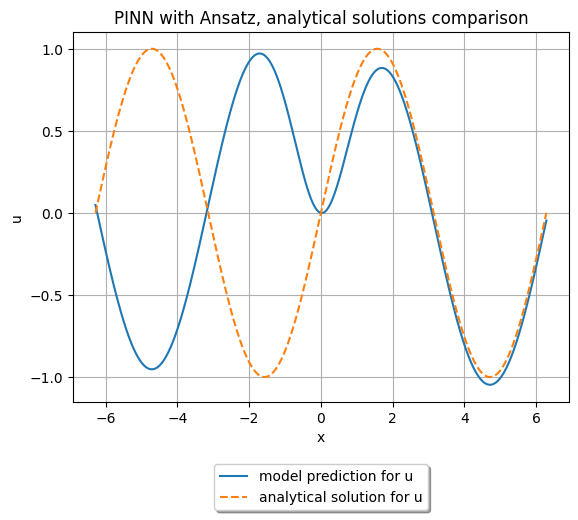

In [21]:
x_data, u_pred, u_true, residual = Procedure(1.0, 2, 16, 200, 1000)

# Plot
plt.title('PINN, analytical solutions comparison')
plt.plot(x_data, u_pred, label='model prediction for u')
plt.plot(x_data, u_true, label='analytical solution for u', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('u')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

x_data, u_pred, u_true, residual = Procedure_Ansatz(1.0, 2, 16, 200, 1000)

# Plot
plt.title('PINN with Ansatz, analytical solutions comparison')
plt.plot(x_data, u_pred, label='model prediction for u')
plt.plot(x_data, u_true, label='analytical solution for u', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('u')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

Compiling model...
Building feed-forward neural network...
'build' took 0.067542 s



/home/mateusz-krol/Desktop/repos/Computation-Methods-for-Science-and-Technology/.venv/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.630580 s

Training model...

Step      Train loss              Test loss               Test metric
0         [5.16e-01, nan]         [5.16e-01, nan]         []  

Best model at step 0:
  train loss: inf
  test loss: inf
  test metric: 

'train' took 0.990049 s



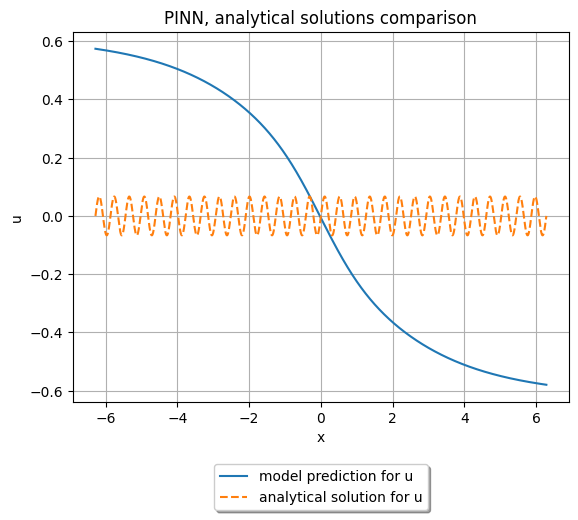

Compiling model...
Building feed-forward neural network...
'build' took 0.062277 s



/home/mateusz-krol/Desktop/repos/Computation-Methods-for-Science-and-Technology/.venv/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.557297 s

Training model...

Step      Train loss    Test loss     Test metric
0         [5.08e-01]    [5.08e-01]    []  
1000      [5.00e-01]    [5.00e-01]    []  
2000      [5.00e-01]    [5.00e-01]    []  
3000      [5.00e-01]    [5.00e-01]    []  
4000      [5.00e-01]    [5.00e-01]    []  
5000      [4.12e-01]    [4.13e-01]    []  
6000      [3.84e-01]    [3.85e-01]    []  
7000      [3.76e-01]    [3.76e-01]    []  
8000      [3.74e-01]    [3.74e-01]    []  
9000      [3.61e-01]    [3.61e-01]    []  
10000     [3.60e-01]    [3.60e-01]    []  
11000     [3.57e-01]    [3.57e-01]    []  
12000     [3.42e-01]    [3.43e-01]    []  
13000     [3.41e-01]    [3.41e-01]    []  
14000     [3.40e-01]    [3.40e-01]    []  
15000     [3.39e-01]    [3.40e-01]    []  
16000     [3.33e-01]    [3.33e-01]    []  
17000     [3.31e-01]    [3.31e-01]    []  
18000     [3.30e-01]    [3.31e-01]    []  
19000     [3.30e-01]    [3.30e-01]    []  
20000     [3.21e-01]    [3.22e-01]    []  
2

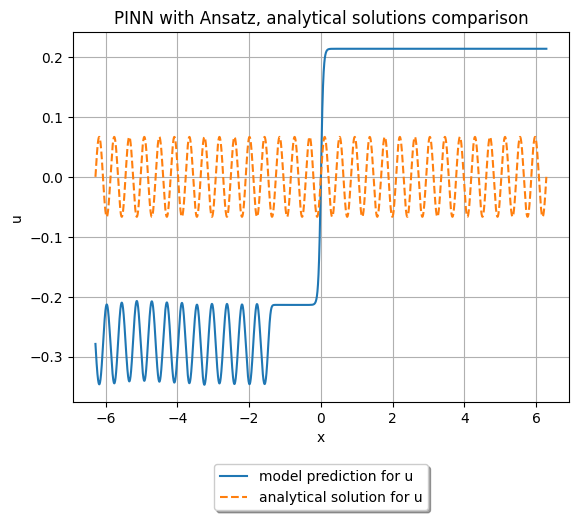

Compiling model...
Building feed-forward neural network...
'build' took 0.101136 s



/home/mateusz-krol/Desktop/repos/Computation-Methods-for-Science-and-Technology/.venv/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.808466 s

Training model...

Step      Train loss              Test loss               Test metric
0         [5.00e-01, nan]         [5.00e-01, nan]         []  

Best model at step 0:
  train loss: inf
  test loss: inf
  test metric: 

'train' took 1.284216 s



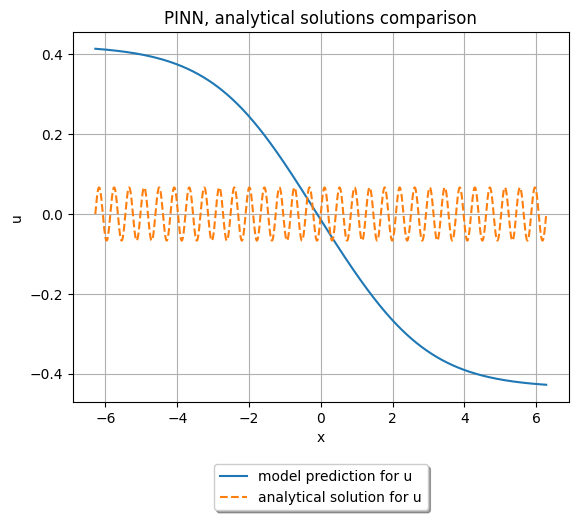

Compiling model...
Building feed-forward neural network...
'build' took 0.108542 s



/home/mateusz-krol/Desktop/repos/Computation-Methods-for-Science-and-Technology/.venv/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 1.036565 s

Training model...

Step      Train loss    Test loss     Test metric
0         [5.07e-01]    [5.07e-01]    []  
1000      [5.00e-01]    [5.00e-01]    []  
2000      [5.00e-01]    [5.00e-01]    []  
3000      [5.00e-01]    [5.00e-01]    []  
4000      [5.00e-01]    [5.00e-01]    []  
5000      [5.00e-01]    [5.00e-01]    []  
6000      [5.00e-01]    [5.00e-01]    []  
7000      [5.00e-01]    [5.00e-01]    []  
8000      [5.00e-01]    [5.00e-01]    []  
9000      [5.00e-01]    [5.00e-01]    []  
10000     [4.97e-01]    [4.97e-01]    []  
11000     [5.02e-01]    [5.02e-01]    []  
12000     [5.00e-01]    [5.00e-01]    []  
13000     [5.00e-01]    [4.99e-01]    []  
14000     [4.48e-01]    [4.49e-01]    []  
15000     [3.85e-01]    [3.86e-01]    []  
16000     [3.65e-01]    [3.65e-01]    []  
17000     [3.50e-01]    [3.50e-01]    []  
18000     [3.32e-01]    [3.33e-01]    []  
19000     [2.93e-01]    [2.94e-01]    []  
20000     [2.23e-01]    [2.23e-01]    []  
2

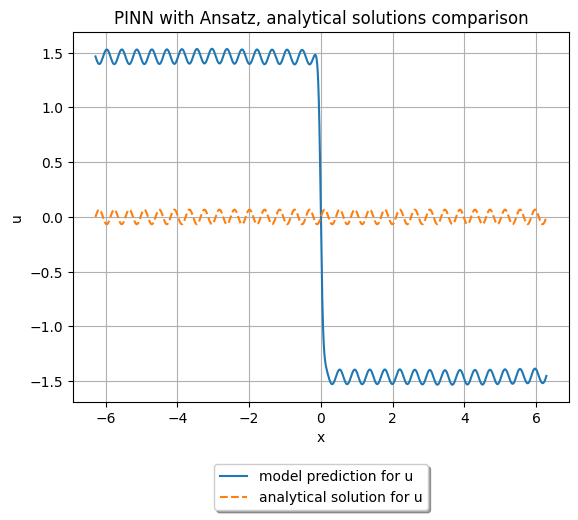

Compiling model...
Building feed-forward neural network...
'build' took 0.158008 s



/home/mateusz-krol/Desktop/repos/Computation-Methods-for-Science-and-Technology/.venv/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 1.189729 s

Training model...

Step      Train loss              Test loss               Test metric
0         [5.03e-01, nan]         [5.03e-01, nan]         []  

Best model at step 0:
  train loss: inf
  test loss: inf
  test metric: 

'train' took 2.085345 s



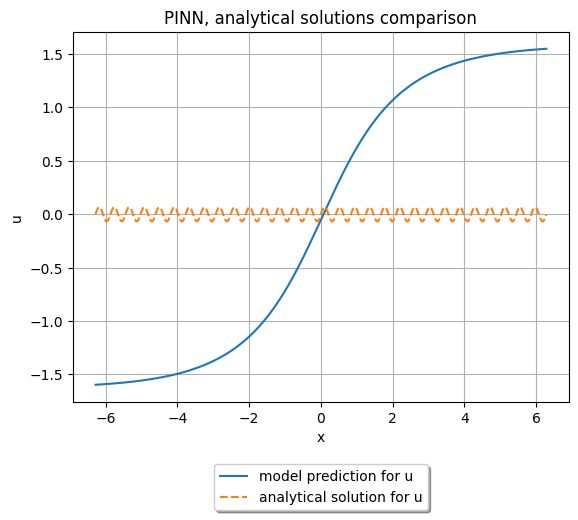

Compiling model...
Building feed-forward neural network...
'build' took 0.181721 s



/home/mateusz-krol/Desktop/repos/Computation-Methods-for-Science-and-Technology/.venv/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 1.204851 s

Training model...

Step      Train loss    Test loss     Test metric
0         [5.22e-01]    [5.22e-01]    []  
1000      [5.00e-01]    [5.00e-01]    []  
2000      [5.00e-01]    [5.00e-01]    []  
3000      [5.00e-01]    [5.00e-01]    []  
4000      [5.00e-01]    [5.00e-01]    []  
5000      [5.00e-01]    [5.00e-01]    []  
6000      [5.00e-01]    [5.00e-01]    []  


In [22]:
for layers, neurons in [(2, 16), (4, 64), (5, 128)]:  
        x_data, u_pred, u_true, residual = Procedure(15.0, layers, neurons, 200*15, 5000)

        # Plot
        plt.title('PINN, analytical solutions comparison')
        plt.plot(x_data, u_pred, label='model prediction for u')
        plt.plot(x_data, u_true, label='analytical solution for u', linestyle='dashed')
        plt.xlabel('x')
        plt.ylabel('u')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
                fancybox=True, shadow=True, ncol=1)
        plt.grid()
        plt.show()

        x_data, u_pred, u_true, residual = Procedure_Ansatz(15.0, layers, neurons, 200*15, 5000)

        # Plot
        plt.title('PINN with Ansatz, analytical solutions comparison')
        plt.plot(x_data, u_pred, label='model prediction for u')
        plt.plot(x_data, u_true, label='analytical solution for u', linestyle='dashed')
        plt.xlabel('x')
        plt.ylabel('u')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
                fancybox=True, shadow=True, ncol=1)
        plt.grid()
        plt.show()